In [48]:
import os
import pandas as pd
import glob
from tqdm import tqdm
from scipy.io import wavfile
from scipy import signal
import numpy as np
import soundfile as sf
os.chdir('../src/')
import config
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython.display as ipd
import joblib
import img.augmentation as aug
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from utils import utils
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [82]:
# folders_list = ['nn_0', 'nn_1', 'nn_3', 'nn_4', 'nn_5', 'nn_6', 'nn_7', 'nn_8', 'nn_9', 'nn_10', 'nn_11']
folders_list = ['pseudo_n_n']
accuracy_df = None
for nn_folder in tqdm(folders_list):
    le = joblib.load(config.OUTPUT_FOLDER + '%s/label_encoder.dump'%nn_folder)

    gt_train = pd.read_csv(config.DATA_FOLDER + 'gt_train.csv')

    sub_train = pd.read_csv(config.OUTPUT_FOLDER + '%s/pred_train.csv'%nn_folder)
    sub_train.rename(columns = {str(i) : le.inverse_transform(i) for i in np.arange(31)}, inplace = True)
    sub_train['target'] = sub_train.drop('id', 1).idxmax(axis =1)
    sub_train.rename(columns = {'target' : 'pred_target'}, inplace = True)

    df = gt_train.merge(sub_train, on = 'id')
    assert len(df) == len(sub_train)

    accuracy_score(df['target'], df['pred_target'])
    unique_labels = df['target'].unique().tolist()

    df_list = []
    for i in (np.arange(5)): 
        val_ids = splits_dict[i]['val']
        slice_df = df[df['id'].isin(val_ids)]
        for c in unique_labels:
            a = accuracy_score(slice_df['target'].apply(lambda x: x if x == c else 'hui'), 
                               slice_df['pred_target'].apply(lambda x: x if x == c else 'hui'))
            df_list.append({'fold' : i, 'label' : c,  nn_folder: a})    
    tmp = pd.DataFrame(df_list)
    
    if accuracy_df is None:
        accuracy_df = tmp
    else:
        accuracy_df = accuracy_df.merge(tmp, on = ['label', 'fold'])
        
accuracy_df['accuracy'] = accuracy_df[folders_list].max(axis = 1)

100%|██████████| 1/1 [00:05<00:00,  5.38s/it]


In [88]:
nn_folder = 'stacker_xgb_14'

gt_train = pd.read_csv(config.DATA_FOLDER + 'gt_train.csv')

sub_train = pd.read_csv(config.OUTPUT_FOLDER + '%s/sub_train.csv'%nn_folder)
sub_train.rename(columns = {'target' : 'pred_target'}, inplace = True)

df = gt_train.merge(sub_train, on = 'id')
assert len(df) == len(sub_train)

accuracy_score(df['target'], df['pred_target'])
unique_labels = df['target'].unique().tolist()

df_list = []
for i in (np.arange(5)):
    val_ids = splits_dict[i]['val']
    slice_df = df[df['id'].isin(val_ids)]
    for c in unique_labels:
        a = accuracy_score(slice_df['target'].apply(lambda x: x if x == c else 'hui'), 
                           slice_df['pred_target'].apply(lambda x: x if x == c else 'hui'))
        df_list.append({'fold' : i, 'label' : c,  nn_folder: a})    
accuracy_df = pd.DataFrame(df_list)

Text(0.5,1,u'stacker_xgb_14')

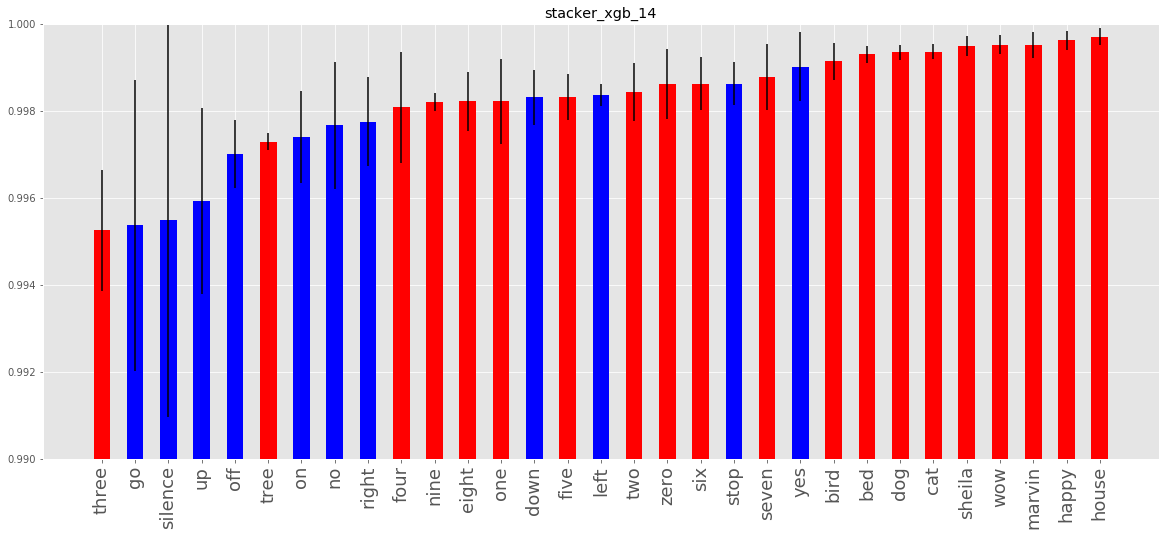

In [89]:
col = 'stacker_xgb_14'

grouped_accuracy_df = accuracy_df.groupby('label').agg({col : ['mean', 'median', 'std']})
grouped_accuracy_df.columns = ["_".join(x) for x in grouped_accuracy_df.columns]
grouped_accuracy_df.reset_index(inplace = True)
grouped_accuracy_df.sort_values(['%s_mean'%col], inplace = True)
grouped_accuracy_df['color'] = grouped_accuracy_df['label'].apply(lambda x: 'blue' \
                                 if x in config.allowed_train_labels else 'red')

f,ax = plt.subplots(figsize = (20,8))
ax.bar(np.arange(len(grouped_accuracy_df)), grouped_accuracy_df['%s_mean'%col], 
       yerr = grouped_accuracy_df['%s_std'%col], width = 0.5, color = grouped_accuracy_df['color'] )
ax.set_xticks(np.arange(len(grouped_accuracy_df)))
ax.set_xticklabels(grouped_accuracy_df['label'], rotation = 90, fontsize = 18)
ax.set_ylim([0.99, 1])
ax.set_title(col)

Text(0.5,1,u'stacker_xgb_8')

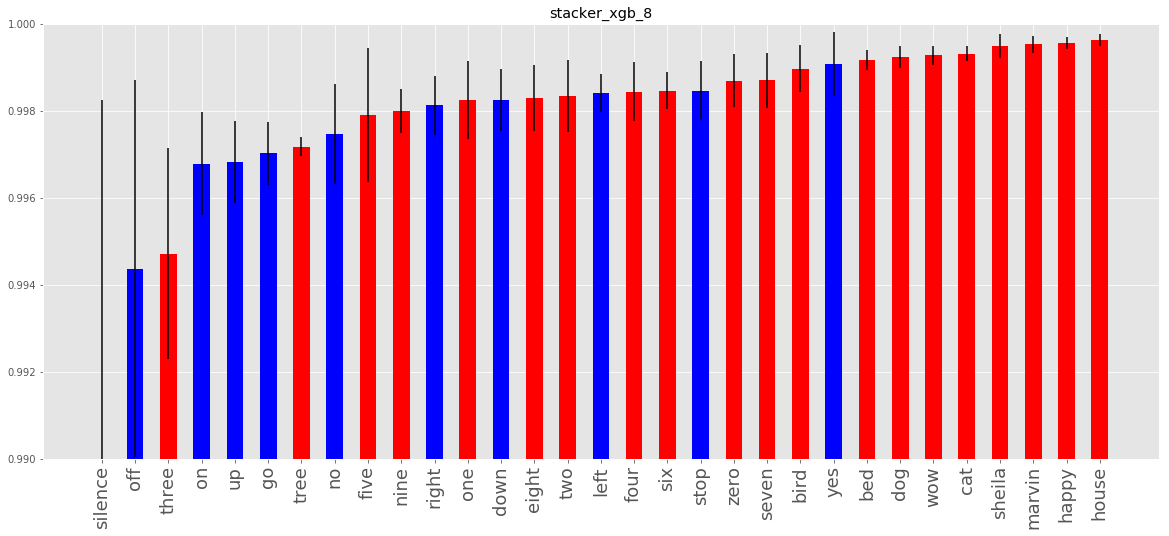

In [87]:
col = 'stacker_xgb_8'

grouped_accuracy_df = accuracy_df.groupby('label').agg({col : ['mean', 'median', 'std']})
grouped_accuracy_df.columns = ["_".join(x) for x in grouped_accuracy_df.columns]
grouped_accuracy_df.reset_index(inplace = True)
grouped_accuracy_df.sort_values(['%s_mean'%col], inplace = True)
grouped_accuracy_df['color'] = grouped_accuracy_df['label'].apply(lambda x: 'blue' \
                                 if x in config.allowed_train_labels else 'red')

f,ax = plt.subplots(figsize = (20,8))
ax.bar(np.arange(len(grouped_accuracy_df)), grouped_accuracy_df['%s_mean'%col], 
       yerr = grouped_accuracy_df['%s_std'%col], width = 0.5, color = grouped_accuracy_df['color'] )
ax.set_xticks(np.arange(len(grouped_accuracy_df)))
ax.set_xticklabels(grouped_accuracy_df['label'], rotation = 90, fontsize = 18)
ax.set_ylim([0.99, 1])
ax.set_title(col)

Text(0.5,1,u'pseudo_n_n')

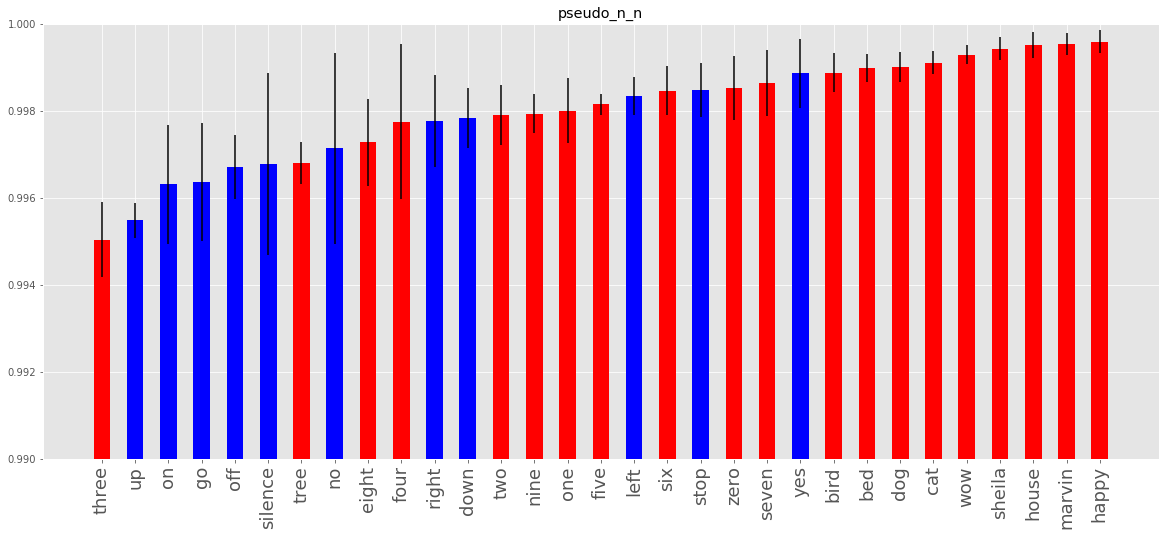

In [83]:
col = 'pseudo_n_n'

grouped_accuracy_df = accuracy_df.groupby('label').agg({col : ['mean', 'median', 'std']})
grouped_accuracy_df.columns = ["_".join(x) for x in grouped_accuracy_df.columns]
grouped_accuracy_df.reset_index(inplace = True)
grouped_accuracy_df.sort_values(['%s_mean'%col], inplace = True)
grouped_accuracy_df['color'] = grouped_accuracy_df['label'].apply(lambda x: 'blue' \
                                 if x in config.allowed_train_labels else 'red')

f,ax = plt.subplots(figsize = (20,8))
ax.bar(np.arange(len(grouped_accuracy_df)), grouped_accuracy_df['%s_mean'%col], 
       yerr = grouped_accuracy_df['%s_std'%col], width = 0.5, color = grouped_accuracy_df['color'] )
ax.set_xticks(np.arange(len(grouped_accuracy_df)))
ax.set_xticklabels(grouped_accuracy_df['label'], rotation = 90, fontsize = 18)
ax.set_ylim([0.99, 1])
ax.set_title(col)

In [15]:
def get_splits(folder):
    splits = {}
    for i in np.arange(5):
        splits[i] = {}
        for c in ['train', 'val']:
            splits[i][c] = utils.read_list_from_file(config.OUTPUT_FOLDER + folder + '/splits/%s_%d.txt'%(c, i))
    return splits
splits_dict = get_splits(nn_folder)

In [32]:
grouped_accuracy_df['accuracy_mean']

label
bed        0.998819
bird       0.998720
cat        0.998581
dog        0.998875
down       0.997107
eight      0.997465
five       0.997934
four       0.997952
go         0.994898
happy      0.999321
house      0.999346
left       0.998052
marvin     0.999366
nine       0.997931
no         0.996951
off        0.996531
on         0.996785
one        0.997505
right      0.997004
seven      0.998055
sheila     0.999235
silence    0.995881
six        0.997990
stop       0.997642
three      0.994200
tree       0.996255
two        0.997333
up         0.993235
wow        0.999246
yes        0.998721
zero       0.998381
Name: accuracy_mean, dtype: float64

In [54]:
from sklearn import svm
X = [[-2], [1], [34], [9]]
Y = [0, 1, 2, 3]

lin_clf = svm.LinearSVC(dual=False)
lin_clf.fit(X, Y) 
dec = lin_clf.decision_function([[1]])
dec.shape[1]
4

4

In [55]:
dec

array([[-0.82352668, -0.21569241, -0.90267333, -0.39396641]])

In [57]:
lin_clf.